In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# since we already know that column 0 is the date then we set that as the index
# Note When reading timestamp columns from a CSV file, the option parse_dates=True is a useful shortcut if the 
#     timestamp is the index.
# Otherwise parse_dates=['col_name'] works as well.
bike = pd.read_csv('../Data/train.csv', sep=',', index_col=0, parse_dates=True)

### import the data from **Bike Sharing Demand**

## EDA bike dataframe

* datetime: hourly date + timestamp  
* season:
    - 1 = spring 
    - 2 = summer
    - 3 = fall
    - 4 = winter 
* holiday: whether the day is considered a holiday
* workingday: whether the day is neither a weekend nor holiday
* weather: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp: temperature in Celsius
* atemp: "feels like" temperature in Celsius
* humidity: relative humidity
* windspeed: wind speed
* casual: number of non-registered user rentals initiated
* registered: number of registered user rentals initiated
* count: number of total rentals

In [3]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [4]:
# drop: 'atemp' beacuse it has a 0.98 correlation with 'temp'
# drop: 'casual' and 'registered' because the sum of this is the total rental ('count') 
# ----> which could potentially give redundant info and cause leakage in the model prediction
bike.head(4)
bike.drop(columns=['casual', 'registered', 'atemp'], inplace=True)

In [5]:
#bike[['temp', 'humidity', 'windspeed', 'count']].describe()

### taking info from the **datatime** column(index) to add additional features of high importance

In [6]:
bike['month'] = bike.index.month
bike['week'] = bike.index.weekday
bike['hour'] = bike.index.hour
bike['year'] = bike.index.year
bike

,season,holiday,workingday,weather,temp,humidity,windspeed,count,month,week,hour,year
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16,1,5,0,2011
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40,1,5,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32,1,5,2,2011
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13,1,5,3,2011
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1,1,5,4,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336,12,2,19,2012
2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241,12,2,20,2012
2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168,12,2,21,2012


In [7]:
bike['month'].unique()
#bike['hour'].unique()
#bike['week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
# week = hot encode = meaning that each day will have its own column 
# ---> making working day irrelevant and redundant data 
# ---> drop that column 'working day'
check = bike[['workingday', 'week']]
check.head(5)

,workingday,week
datetime,,
2011-01-01 00:00:00,0,5
2011-01-01 01:00:00,0,5
2011-01-01 02:00:00,0,5
2011-01-01 03:00:00,0,5
2011-01-01 04:00:00,0,5


In [9]:
bike.drop(columns=['workingday'], inplace=True)
bike.head(5)

,season,holiday,weather,temp,humidity,windspeed,count,month,week,hour,year
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,9.84,81,0.0,16,1,5,0,2011
2011-01-01 01:00:00,1,0,1,9.02,80,0.0,40,1,5,1,2011
2011-01-01 02:00:00,1,0,1,9.02,80,0.0,32,1,5,2,2011
2011-01-01 03:00:00,1,0,1,9.84,75,0.0,13,1,5,3,2011
2011-01-01 04:00:00,1,0,1,9.84,75,0.0,1,1,5,4,2011


array([[<AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='humidity', ylabel='temp'>,
        <AxesSubplot:xlabel='windspeed', ylabel='temp'>],
       [<AxesSubplot:xlabel='temp', ylabel='humidity'>,
        <AxesSubplot:xlabel='humidity', ylabel='humidity'>,
        <AxesSubplot:xlabel='windspeed', ylabel='humidity'>],
       [<AxesSubplot:xlabel='temp', ylabel='windspeed'>,
        <AxesSubplot:xlabel='humidity', ylabel='windspeed'>,
        <AxesSubplot:xlabel='windspeed', ylabel='windspeed'>]],
      dtype=object)

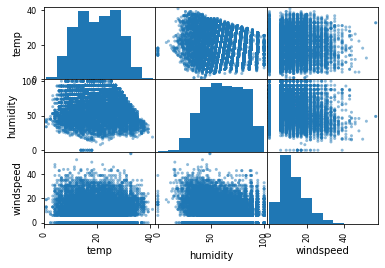

In [10]:
# scatter matrix for all features
pd.plotting.scatter_matrix(bike[['temp', 'humidity', 'windspeed']])

Text(0.5, 1.0, 'Correlation Heatmap')

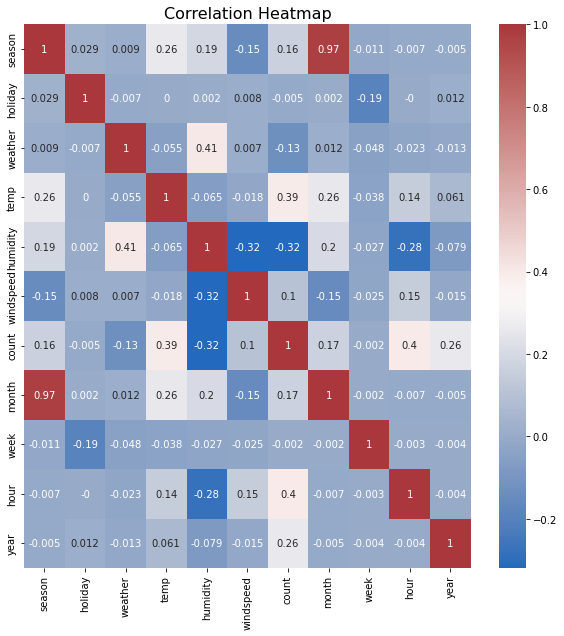

In [11]:
# pearson correlation is best for numerical features 
# not the best for the categorical features 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data=bike.corr().round(3), cmap="vlag", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16})

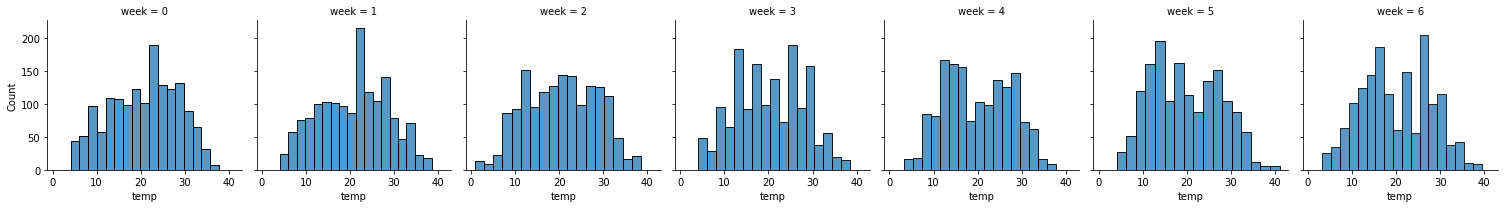

In [12]:
# Facetgrid to look at several plots simultaneously
ag = sns.FacetGrid(bike, col="week")
ag.map(sns.histplot, "temp")

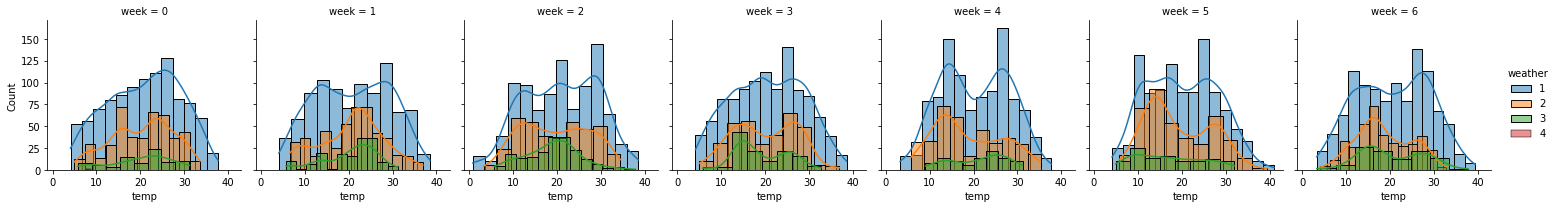

In [13]:
cg = sns.FacetGrid(bike, col="week", hue='weather')
cg.map(sns.histplot, "temp", kde=True, multiple="stack")
cg.add_legend()

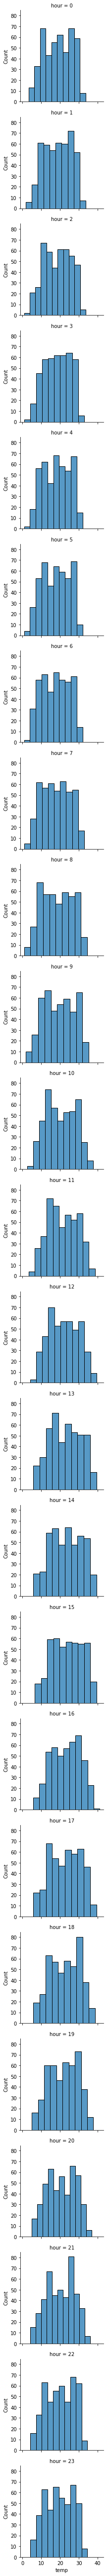

In [14]:
bg = sns.FacetGrid(bike, row='hour')
bg.map(sns.histplot, "temp")
bg.add_legend()

<AxesSubplot:xlabel='temp', ylabel='count'>

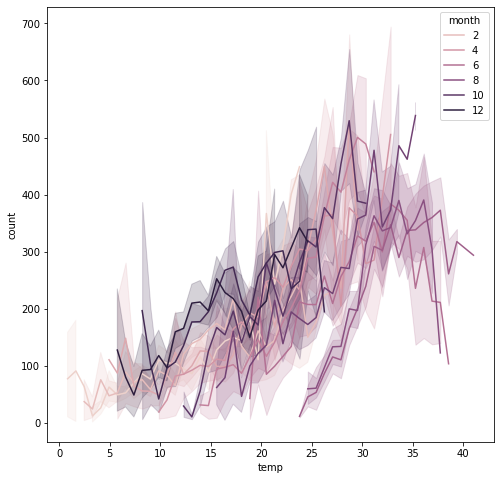

In [15]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=bike, x='temp', y='count', hue='month')

#the ideal temperature for max rentals is within a range of 25 - 33 degrees


<AxesSubplot:xlabel='humidity', ylabel='count'>

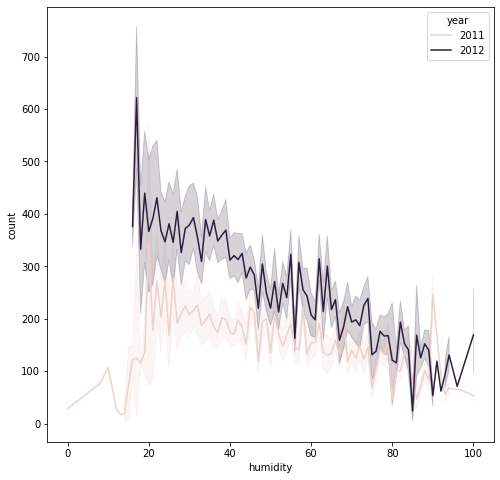

In [16]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=bike, x='humidity', y='count', hue='year')

<AxesSubplot:xlabel='temp', ylabel='Count'>

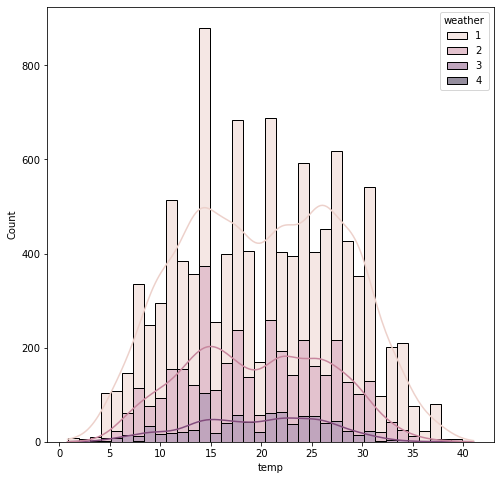

In [17]:
plt.figure(figsize=(8, 8))
sns.histplot(data=bike, x='temp', hue='weather', kde=True, multiple="stack")

In [18]:
g1 = bike.groupby(["hour", "week", "month"])["temp", "count"].mean().round(2)
g1.head()

temp  count
hour week month              
0    0    1       9.02  17.67
          2      10.25  14.00
          3      12.79  15.80
          4      19.82  27.17
          5      20.99  67.40

<AxesSubplot:xlabel='hour'>

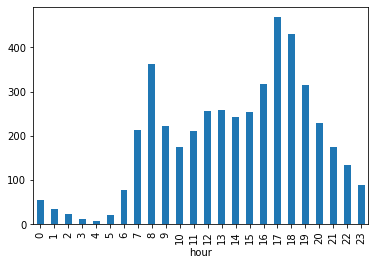

In [19]:
g2 = bike.groupby(["hour"])["count"].mean().round(2)
g2.plot.bar()

<AxesSubplot:xlabel='month'>

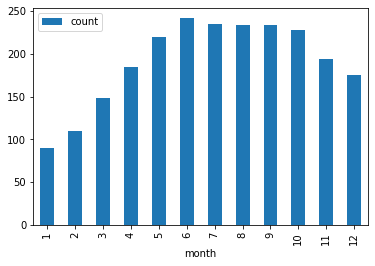

In [20]:
month = bike.groupby(['month']).agg('mean')[['count']].plot(kind='bar')
month

In [21]:
week = bike.groupby(['week']).agg('mean')
week

,season,holiday,weather,temp,humidity,windspeed,count,month,hour,year
week,,,,,,,,,,
0,2.560284,0.154094,1.398453,20.620542,62.508059,12.921691,190.390716,6.651193,11.549968,2011.508704
1,2.511371,0.000000,1.510721,20.732307,63.662768,13.338829,189.723847,6.481481,11.596491,2011.497726
2,2.482914,0.015474,1.501612,20.323417,64.299162,12.635379,188.411348,6.421019,11.548678,2011.509994
3,2.480361,0.000000,1.377978,20.251835,58.397939,13.138079,197.296201,6.455248,11.537669,2011.509337
4,2.506867,0.031393,1.368215,19.993198,59.913015,12.398527,197.844343,6.567691,11.535644,2011.486593
5,2.500000,0.000000,1.393939,19.668611,61.253157,12.670136,196.665404,6.560606,11.500000,2011.484848
6,2.504750,0.000000,1.379354,20.041963,63.151995,12.499344,180.839772,6.512983,11.524383,2011.516149


In [22]:
hour = bike.groupby(['hour']).agg('mean')
hour

,season,holiday,weather,temp,humidity,windspeed,count,month,week,year
hour,,,,,,,,,,
0,2.503297,0.028571,1.393407,19.013187,68.079121,10.701564,55.138462,6.512088,3.013187,2011.501099
1,2.502203,0.028634,1.431718,18.639648,69.581498,10.418839,33.859031,6.506608,3.017621,2011.502203
2,2.522321,0.029018,1.401786,18.455491,70.622768,10.125315,22.899554,6.560268,3.017857,2011.506696
3,2.556582,0.027714,1.401848,18.433903,72.293303,10.173416,11.757506,6.697460,3.087760,2011.512702
4,2.545249,0.029412,1.427602,18.036290,73.640271,10.717605,6.407240,6.638009,3.024887,2011.513575
5,2.513274,0.028761,1.422566,17.610044,73.409292,10.062407,19.767699,6.542035,2.993363,2011.504425
6,2.503297,0.028571,1.450549,17.481319,73.934066,10.433402,76.259341,6.512088,3.013187,2011.501099
7,2.503297,0.028571,1.479121,17.787692,72.292308,10.879283,213.116484,6.512088,3.013187,2011.501099
8,2.503297,0.028571,1.465934,18.461714,69.553846,11.787155,362.769231,6.512088,3.013187,2011.501099


array([[<AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='humidity', ylabel='temp'>,
        <AxesSubplot:xlabel='windspeed', ylabel='temp'>],
       [<AxesSubplot:xlabel='temp', ylabel='humidity'>,
        <AxesSubplot:xlabel='humidity', ylabel='humidity'>,
        <AxesSubplot:xlabel='windspeed', ylabel='humidity'>],
       [<AxesSubplot:xlabel='temp', ylabel='windspeed'>,
        <AxesSubplot:xlabel='humidity', ylabel='windspeed'>,
        <AxesSubplot:xlabel='windspeed', ylabel='windspeed'>]],
      dtype=object)

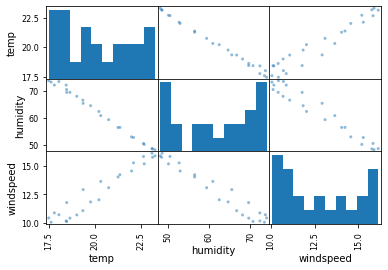

In [23]:
pd.plotting.scatter_matrix(hour[['temp', 'humidity', 'windspeed']])

In [40]:
# features
X = bike[['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'month', 'year', 'week']]

# label
y = bike['count']

### Preprocessing and feature engineering features

In [53]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

order: of my df --> 

season	- holiday	- weather	- temp	- humidity	- windspeed	- month	- week	- hour	- year

## Plan A: 

    * OneHotEncode ---> week
    * Kbins ---> hours
    * standard scaler ---> temp, humidity, windspeed, year, month, season, weather
    * pass through ---> holiday

In [55]:
pipeline1 = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

In [56]:
def day_rush(df):
    df.loc[(df['hour']>= 0) & (df['hour'] < 5), 'hour'] = 0
    df.loc[(df['hour']>= 5) & (df['hour'] < 10), 'hour'] = 1
    df.loc[(df['hour']>= 10) & (df['hour'] < 15), 'hour'] = 2
    df.loc[(df['hour']>= 15) & (df['hour'] < 19), 'hour'] = 3
    df.loc[(df['hour']>= 19) & (df['hour'] <= 23), 'hour'] = 4
   
    return df[['hour']]

In [57]:
pipeline2 = make_pipeline(
    FunctionTransformer(day_rush), 
    OneHotEncoder(handle_unknown="ignore")
    )

In [75]:
# temp, humidity, windspeed, year, month, season, weather
num_features = ['temp', 'humidity', 'windspeed', 'year', 'month', 'season', 'weather']
pipeline3 = make_pipeline(
    MinMaxScaler(), 
    )

In [76]:
# months would be the same as seasons
pipeline4 = make_pipeline(
    KBinsDiscretizer(n_bins=4, strategy='quantile')
)

passthrough = holiday

In [77]:
preprocessor_a = ColumnTransformer(
    transformers=[
        ('1', pipeline1, ['week']),
        ('2', pipeline2, ['hour']),
        ('3', pipeline3, num_features)
     ],
        remainder='passthrough')

### Make pipeline for models 

* behaves as your transformer


In [78]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)
X_train.shape, y_train.shape

((6531, 10), (6531,))

In [79]:
X_train.head()

,season,holiday,weather,temp,humidity,windspeed,hour,month,year,week
datetime,,,,,,,,,,
2011-06-04 15:00:00,2,0,2,30.34,27,27.9993,15,6,2011,5
2012-07-05 08:00:00,3,0,1,32.80,49,8.9981,8,7,2012,3
2011-10-18 00:00:00,4,0,1,19.68,82,0.0000,0,10,2011,1
2011-01-07 14:00:00,1,0,2,8.20,40,16.9979,14,1,2011,4
2011-12-01 19:00:00,4,0,1,13.94,46,7.0015,19,12,2011,3


## train and test **MODEL A**

In [80]:
model_a_lr = make_pipeline(
    preprocessor_a, 
    LinearRegression()
    )

In [83]:
model_a_lr.fit(X_train, y_train)

# calculate the accuracy score from training data
model_a_train_accur = model_a_lr.score(X_train, y_train) 
print('Train accuracy: ', model_a_train_accur)
# calculate the accuracy score from test data
model_a_test_accur = model_a_lr.score(X_test, y_test)
print('Test accuracy: ', model_a_test_accur)

Train accuracy:  0.5199864067482461
Test accuracy:  0.5091265566793864


In [84]:
model_a_rfr = make_pipeline(
    preprocessor_a, 
    RandomForestRegressor(n_estimators=100, max_depth=4),
    )

In [85]:
model_a_rfr.fit(X_train, y_train)

# calculate the accuracy score from training data
model_a_train_accur = model_a_rfr.score(X_train, y_train) 
print('Train accuracy: ', model_a_train_accur)
# calculate the accuracy score from test data
model_a_test_accur = model_a_rfr.score(X_test, y_test)
print('Test accuracy: ', model_a_test_accur)

Train accuracy:  0.5397982126741027
Test accuracy:  0.5191304259770924
